In [86]:
# Select start and end date
start_date = '2023-07-20 10:20:00'
end_date = '2023-07-20 11:30:00'

# # 1m/s, rectangle 1
# start_date = '2023-07-20 10:29:00'
# end_date = '2023-07-20 10:35:00'
start_date = '2023-07-20 10:30:10'
end_date = '2023-07-20 10:33:20'

# # 1m/s, rectangle 2
# start_date = '2023-07-20 10:38:00'
# end_date = '2023-07-20 10:43:30'
# start_date = '2023-07-20 10:38:50'
# end_date = '2023-07-20 10:42:00'

# # 5m/s, rectangle
# start_date = '2023-07-20 10:50:00'
# end_date = '2023-07-20 10:53:00'
# start_date = '2023-07-20 10:50:45'
# end_date = '2023-07-20 10:51:50'

# # 1m/s, 8
# start_date = '2023-07-20 10:57:00'
# end_date = '2023-07-20 11:03:30'
start_date = '2023-07-20 10:58:00'
end_date = '2023-07-20 11:01:50'

# # 5m/s, 8
# start_date = '2023-07-20 11:04:00'
# end_date = '2023-07-20 11:10:00'
# start_date = '2023-07-20 11:05:00'
# end_date = '2023-07-20 11:06:10'

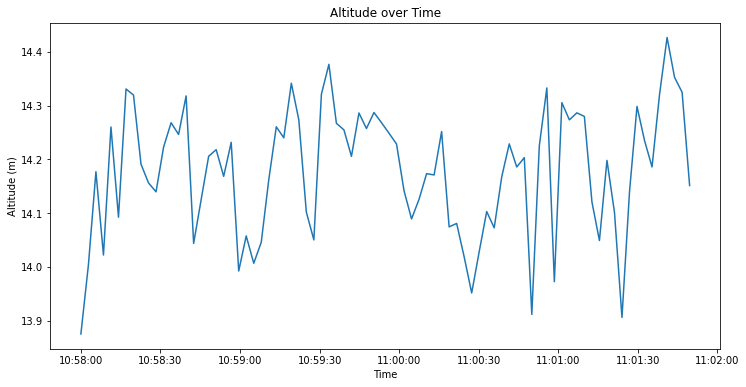

/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_37218/587802251.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_37218/587802251.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



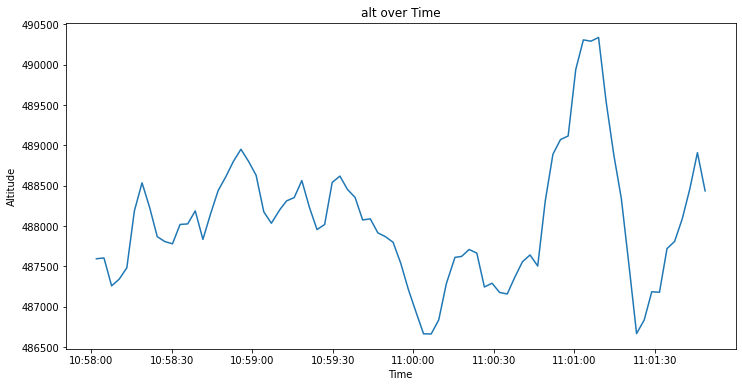

In [87]:
# visualize altitude, and gps location on map

import pandas as pd
import folium
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Load the CSV data into a DataFrame
data = pd.read_csv('data_0720/pixhawk_gps.csv', skipinitialspace=True)

# Convert received_time to datetime format
data['received_time'] = pd.to_datetime(data['received_time'], unit='ns')

# Localize the timestamp to GMT first (assuming the original time is in GMT)
data['received_time'] = data['received_time'].dt.tz_localize('GMT')

# Convert to Rome time
data['received_time'] = data['received_time'].dt.tz_convert('Europe/Rome')

# Filter data based on the date range
mask = (data['received_time'] > start_date) & (data['received_time'] <= end_date)
data = data.loc[mask]


data_altitude = data.dropna(subset=['altitude'])

# Plot altitude over time
plt.figure(figsize=(12, 6), facecolor="white")
plt.plot(data_altitude['received_time'], data_altitude['altitude'])
plt.xlabel('Time')
plt.ylabel('Altitude (m)')
plt.title('Altitude over Time')
plt.show()

data_gps = data.dropna(subset=['lat', 'lon'])

# Divide by a large number to get latitude and longitude values in the correct range
data_gps['lat'] = data_gps['lat'] / 1e7
data_gps['lon'] = data_gps['lon'] / 1e7

# Plot altitude over time
plt.figure(figsize=(12, 6), facecolor="white")
plt.plot(data_gps['received_time'], data_gps['alt'])
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title('alt over Time')
plt.show()

# Create a scatter mapbox
fig = go.Figure(go.Scattermapbox(
    mode="lines+markers",
    lon=data_gps['lon'],
    lat=data_gps['lat'],
    marker={'size': 5}))

# Set mapbox style and zoom level
fig.update_layout(
    autosize=False, # This line needs to be added
    width=1000, # Adjust as necessary
    height=800, # Adjust as necessary
    mapbox_style="open-street-map",
    mapbox={
        'center': {'lon': data_gps['lon'].mean(), 'lat': data_gps['lat'].mean()},
        'zoom': 18})

fig.show()
